<a href="https://colab.research.google.com/github/analuzna/Mentor-a-M17-Estimaci-n-de-biomasa-en-Inventarios-Forestales-Nacionales/blob/main/Mentoria_M17_Grupo_1_TP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Notebook N1 Mentoría 17

M17 - Inventarios Forestales Nacionales, calculo de biomasa y evaluación del estado de los bosques nativos.

### TP1 >> Análisis y Visualizacion de los datasets
- Grupo 1
- Integrantes:
    - Guillermo Poggioni
    - Ana Luz Alabi Nassr
    - Nicolas Balmaceda

In [33]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Archivo 1 >> Tabla_general_2021

In [34]:
url = 'Data/2INBN_Tabla_general_2021.csv'
df_general = pd.read_csv(url, encoding='latin1')

In [ ]:
#df_general.head(3)

,UM_ID_UM,REGION_OFC,SUBREG,PROVINCIA,MEDIA_ALTURA_UM_EST,SUMA_DAP_X_UM,AREA_BASAL_UM_HA,VOL_M3_HA,CANTIDAD_IND_VIVOS_UM,CANTIDAD_IND_VIVOS_HA,...,FORMAS_CACTACEAS,FORMAS_EPIFITAS,FORMAS_BRIOFITAS,FORMAS_LIANAS,FORMAS_ORQUIDEAS,FORMAS_GRAMINEAS,FORMAS_OTRAS,Ley_N1_06,Ley_N2_06,PRESENTA_IND_INVENTARIABLE
0,6074195,MON,Monte,6.0,3.471429,0.914532,1.560872,1.728589,14.0,257.2,...,False,False,False,False,False,True,False,OTF,Bosque mixto,SI
1,6075190,ESP,Distrito del Caldén,6.0,5.450000,0.665793,2.928567,13.001816,2.0,49.3,...,False,False,False,False,False,True,False,TF,Bosques de caldén abierto con arbustos,SI
2,6076186,ESP,Distrito del Caldén,6.0,3.897143,4.097999,6.866252,44.521998,35.0,877.4,...,True,True,False,False,False,True,False,TF,Bosques de caldén abierto con arbustos,SI



**Variables incluidas en la tabla de datos adjunta:**

| Variable               | Descripción                                                                                         |
|------------------------|-----------------------------------------------------------------------------------------------------|
| **UM_ID_UM**           | Identificador único de cada unidad de muestreo                                                      |
| **REGION_OFC**         | Región forestal                                                                                     |
| **SUBREG**             | Subregión forestal                                                                                  |
| **PROVINCIA**          | Código del Instituto Nacional de Estadísticas y Censos (INDEC)                                      |
| **MEDIA_ALTURA_UM_EST**| Valor medio de la altura de los individuos leñosos vivos en la unidad de muestreo (m)               |
| **SUMA_DAP_X_UM**      | Sumatoria del diámetro a la altura del pecho de los individuos leñosos vivos en la unidad (m)       |
| **AREA_BASAL_UM_HA**   | Área basal por hectárea de los individuos leñosos vivos (m²/ha)                                      |
| **VOL_M3_HA**          | Volumen comercial de madera por hectárea de los individuos leñosos vivos (m³/ha)                    |
| **CANTIDAD_IND_VIVOS_UM** | Número de individuos leñosos vivos en la unidad de muestreo                                      |
| **CANTIDAD_IND_VIVOS_HA** | Número estimado de individuos leñosos vivos por hectárea                                         |
| **PORCENTAJE_COB_3**   | Cobertura (%) de proyecciones aéreas de individuos arbóreos de 3 a 7 m de altura                     |
| **PORCENTAJE_COB_7**   | Cobertura (%) de proyecciones aéreas de individuos arbóreos > 7 m de altura                          |
| **PORCENTAJE_COB_TOTAL** | Cobertura total (%) (con superposición) de proyecciones aéreas de individuos arbóreos             |
| **PORCENTAJE_COB_ARBUSTIVA** | Cobertura (%) de proyecciones aéreas de individuos arbustivos                               |
| **PORCENTAJE_COB_INFERIOR**  | Cobertura (%) de proyecciones aéreas de gramíneas y herbáceas                            |
| **MEDIA_ALT_TOCONES**   | Altura media de tocones en la unidad de muestreo (cm)                                               |
| **MEDIA_DAB_TOCONES**   | Diámetro medio en la base de tocones en la unidad de muestreo (cm)                                  |
| **CANTIDAD_TOCONES_X_UM** | Número de tocones en la unidad de muestreo                                                     |
| **CANTIDAD_TOCONES_X_HA** | Número estimado de tocones por hectárea                                                          |
| **REGENERACION_UM**     | Número total de individuos de regeneración en subparcelas C de la unidad de muestreo                |
| **REGENERACION_HA**     | Número estimado de individuos de regeneración por hectárea                                         |
| **LONGITUD_GRILLA**     | Longitud de la cuadrícula para ubicación de la unidad de muestreo (°)                               |
| **LATITUD_GRILLA**      | Latitud de la cuadrícula para ubicación de la unidad de muestreo (°)                                |
| **LONGITUD_INSTALACION**| Longitud del centro de la unidad de muestreo (°)                                                    |
| **LATITUD_INSTALACION** | Latitud del centro de la unidad de muestreo (°)                                                     |
| **ALTITUD**             | Altitud media sobre el nivel del mar de la parcela (m s.n.m.)                                       |
| **PENDIENTE**           | Categoría de pendiente (sin_pendiente, suave, moderada, fuerte)                                     |
| **EXPOSICION**          | Orientación de la pendiente (N, NE, E, SE, S, SW, O, NO)                                            |
| **OTBN_CATEGORIA**      | Categoría según Ordenamiento Territorial de Bosques Nativos (I, II, III, sin_categoria)             |
| **FECHA_UM_ANIO**       | Año de colecta de datos en la unidad de muestreo                                                    |
| **FECHA_UM_MES**        | Mes de colecta de datos en la unidad de muestreo                                                    |
| **TIPO_PAISAJE**        | Tipo de paisaje predominante en la unidad de muestreo                                               |
| **SALINIDAD_PRESENCIA** | Evidencia de salinidad (TRUE/FALSE)                                                                 |
| **INCENDIOS_RASTROS**   | Rastros de incendios (TRUE/FALSE)                                                                   |
| **PASTOREO_PRESENCIA**  | Evidencia de pastoreo (TRUE/FALSE)                                                                  |
| **GANADO_BOVINO**       | Presencia de ganado bovino (TRUE/FALSE)                                                             |
| **GANADO_OVINO**        | Presencia de ganado ovino (TRUE/FALSE)                                                              |
| **GANADO_CAPRINO**      | Presencia de ganado caprino (TRUE/FALSE)                                                            |
| **GANADO_EQUINO**       | Presencia de ganado equino (TRUE/FALSE)                                                             |
| **GANADO_OTRO**         | Presencia de otro tipo de ganado (TRUE/FALSE)                                                       |
| **GANADO_OTRO_TIPO**    | Texto libre especificando otro tipo de ganado                                                       |
| **EROSION_PRESENCIA**   | Erosión presente (TRUE/FALSE)                                                                       |
| **EROSION_FISICA_PRESENCIA** | Erosión física (TRUE/FALSE)                                                                    |
| **EROSION_EOLICA_PRESENCIA** | Erosión eólica (TRUE/FALSE)                                                                   |
| **EROSION_HIDRICA_PRESENCIA** | Erosión hídrica (TRUE/FALSE)                                                                 |
| **PFNM_PRESENCIA_RESUMEN** | Resumen de especies no arbóreas de interés (texto)                                               |
| **PFNM_REGISTRO_1**     | Especie no arbórea 1 de 5 (nombre científico o “sin registro”)                                       |
| **PFNM_REGISTRO_2**     | Especie no arbórea 2 de 5 (nombre científico o “sin registro”)                                       |
| **PFNM_REGISTRO_3**     | Especie no arbórea 3 de 5 (nombre científico o “sin registro”)                                       |
| **PFNM_REGISTRO_4**     | Especie no arbórea 4 de 5 (nombre científico o “sin registro”)                                       |
| **PFNM_REGISTRO_5**     | Especie no arbórea 5 de 5 (nombre científico o “sin registro”)                                       |
| **FORMAS_HELECHOS**     | Presencia de helechos (TRUE/FALSE)                                                                  |
| **FORMAS_CACTACEAS**    | Presencia de cactáceas (TRUE/FALSE)                                                                 |
| **FORMAS_EPIFITAS**     | Presencia de epífitas (TRUE/FALSE)                                                                  |
| **FORMAS_BRIOFITAS**    | Presencia de briófitas (TRUE/FALSE)                                                                 |
| **FORMAS_LIANAS**       | Presencia de lianas (TRUE/FALSE)                                                                    |
| **FORMAS_ORQUIDEAS**    | Presencia de orquídeas (TRUE/FALSE)                                                                 |
| **FORMAS_GRAMINEAS**    | Presencia de gramíneas (TRUE/FALSE)                                                                 |
| **FORMAS_OTRAS**        | Presencia de otras formas de vida (TRUE/FALSE)                                                      |
| **Ley_N1_06**           | Leyenda Nivel 1 de Bosques Nativos (TF/OTF)                                                          |
| **Ley_N2_06**           | Leyenda Nivel 2 de Bosques Nativos (tipos forestales)                                                |
| **PRESENTA_IND_INVENTARIABLE** | Presencia (“SI”/“NO”) de individuos leñosos inventariables                                 |

In [90]:
# print(f'Shape del dataframe df_general: {df_general.shape}')
# print("")
# df_general.info()

In [ ]:
# df_general['GANADO_CAPRINO'][:3]

0    False
1    False
2    False
Name: GANADO_CAPRINO, dtype: object

In [38]:
columnas_num = df_general.select_dtypes(include=['number']).columns.tolist()
columnas_cat = df_general.select_dtypes(exclude=['number']).columns.tolist()

print("Columnas numéricas:", columnas_num)
print("Columnas categóricas:", columnas_cat)

Columnas numéricas: ['UM_ID_UM', 'PROVINCIA', 'MEDIA_ALTURA_UM_EST', 'SUMA_DAP_X_UM', 'AREA_BASAL_UM_HA', 'VOL_M3_HA', 'CANTIDAD_IND_VIVOS_UM', 'CANTIDAD_IND_VIVOS_HA', 'PORCENTAJE_COB_3', 'PORCENTAJE_COB_7', 'PORCENTAJE_COB_TOTAL', 'PORCENTAJE_COB_ARBUSTIVA', 'PORCENTAJE_COB_INFERIOR', 'MEDIA_ALT_TOCONES', 'MEDIA_DAB_TOCONES', 'CANTIDAD_TOCONES_X_UM', 'CANTIDAD_TOCONES_X_HA', 'REGENERACION_UM', 'REGENERACION_HA', 'LONGITUD_GRILLA', 'LATITUD_GRILLA', 'LONGITUD_INSTALACION', 'LATITUD_INSTALACION', 'ALTITUD', 'FECHA_UM_ANIO', 'FECHA_UM_MES']
Columnas categóricas: ['REGION_OFC', 'SUBREG', 'PENDIENTE_CATEGORIA', 'EXPOSICION', 'OTBN_CATEGORIA', 'TIPO_PAISAJE', 'SALINIDAD_PRESENCIA', 'INCENDIOS_RASTROS', 'PASTOREO_PRESENCIA', 'GANADO_BOVINO', 'GANADO_OVINO', 'GANADO_CAPRINO', 'GANADO_EQUINO', 'GANADO_OTRO', 'GANADO_OTRO_TIPO', 'EROSION_PRESENCIA', 'EROSION_FISICA_PRESENCIA', 'EROSION_EOLICA_PRESENCIA', 'EROSION_HIDRICA_PRESENCIA', 'PFNM_PRESENCIA_RESUMEN', 'PFNM_REGISTRO_1', 'PFNM_REGISTRO_2

#### Se ven que hay variables que contienen valores numéricos pero son de naturaleza categórica
estos son: **FECHA_UM_MES**, **FECHA_UM_ANIO**, **PROVINCIA**

In [39]:
columnas_codificadas = ['FECHA_UM_MES','FECHA_UM_ANIO','PROVINCIA']
columnas_num = [col for col in columnas_num if col not in columnas_codificadas]

print('Columnas CATEGÓRICAS:', columnas_cat)
print('Columnas NUMÉRICAS:', columnas_num)
print('Columnas CODIFICADAS:', columnas_codificadas)

Columnas CATEGÓRICAS: ['REGION_OFC', 'SUBREG', 'PENDIENTE_CATEGORIA', 'EXPOSICION', 'OTBN_CATEGORIA', 'TIPO_PAISAJE', 'SALINIDAD_PRESENCIA', 'INCENDIOS_RASTROS', 'PASTOREO_PRESENCIA', 'GANADO_BOVINO', 'GANADO_OVINO', 'GANADO_CAPRINO', 'GANADO_EQUINO', 'GANADO_OTRO', 'GANADO_OTRO_TIPO', 'EROSION_PRESENCIA', 'EROSION_FISICA_PRESENCIA', 'EROSION_EOLICA_PRESENCIA', 'EROSION_HIDRICA_PRESENCIA', 'PFNM_PRESENCIA_RESUMEN', 'PFNM_REGISTRO_1', 'PFNM_REGISTRO_2', 'PFNM_REGISTRO_3', 'PFNM_REGISTRO_4', 'PFNM_REGISTRO_5', 'FORMAS_HELECHOS', 'FORMAS_CACTACEAS', 'FORMAS_EPIFITAS', 'FORMAS_BRIOFITAS', 'FORMAS_LIANAS', 'FORMAS_ORQUIDEAS', 'FORMAS_GRAMINEAS', 'FORMAS_OTRAS', 'Ley_N1_06', 'Ley_N2_06', 'PRESENTA_IND_INVENTARIABLE']
Columnas NUMÉRICAS: ['UM_ID_UM', 'MEDIA_ALTURA_UM_EST', 'SUMA_DAP_X_UM', 'AREA_BASAL_UM_HA', 'VOL_M3_HA', 'CANTIDAD_IND_VIVOS_UM', 'CANTIDAD_IND_VIVOS_HA', 'PORCENTAJE_COB_3', 'PORCENTAJE_COB_7', 'PORCENTAJE_COB_TOTAL', 'PORCENTAJE_COB_ARBUSTIVA', 'PORCENTAJE_COB_INFERIOR', 'MED

In [40]:
df_general[df_general['FECHA_UM_MES'] > 2.0][columnas_codificadas]

df_general.nunique()

UM_ID_UM                      3891
REGION_OFC                       7
SUBREG                          16
PROVINCIA                       23
MEDIA_ALTURA_UM_EST           3340
                              ... 
FORMAS_GRAMINEAS                 2
FORMAS_OTRAS                     2
Ley_N1_06                        3
Ley_N2_06                       32
PRESENTA_IND_INVENTARIABLE       2
Length: 62, dtype: int64

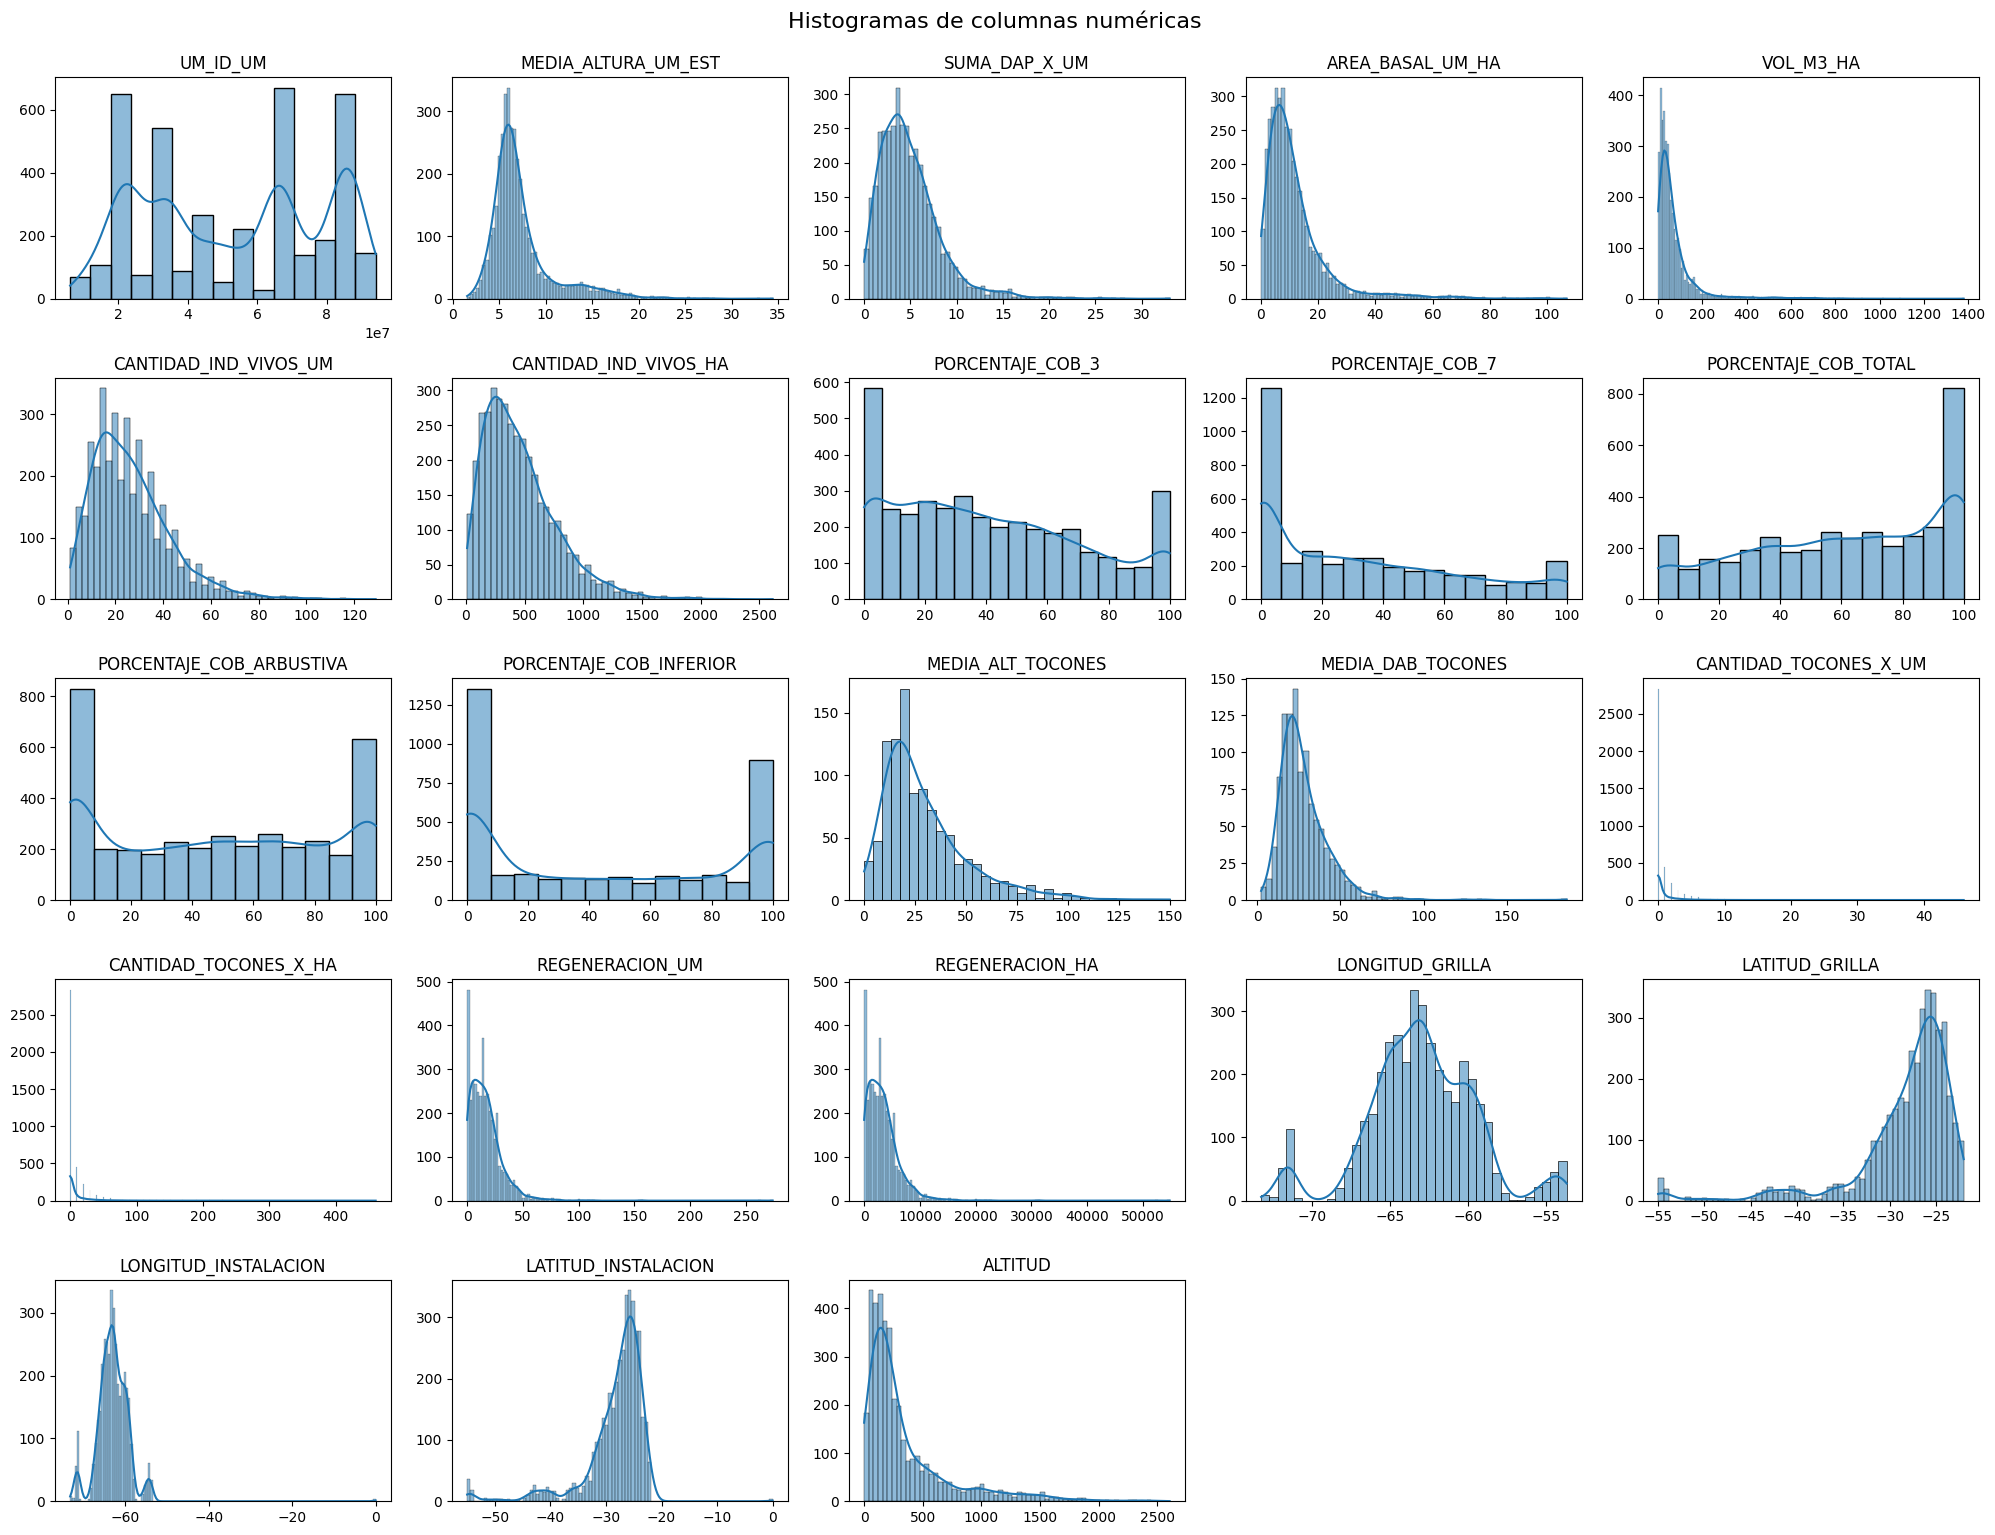

In [41]:
import math
# Número de columnas a graficar
n = len(columnas_num)

# Determinar cantidad de filas y columnas
n_cols = 5
n_rows = math.ceil(n / n_cols)

# Crear figura y ejes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*4, n_rows*3))
axes = axes.flatten()  # Para iterar fácilmente

# Graficar cada histograma
for i, col in enumerate(columnas_num):
    sns.histplot(df_general[col], kde=True, ax=axes[i])
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Borrar subplots vacíos si hay
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Histogramas de columnas numéricas", fontsize=16, y=1.02)
plt.show()

### Drop de outliers y nuevo gráfico:
eliminamos los datos extremos para las variables numéricas, dejando solo los datos entre los cuantiles 1 y 99.

Nos terminan quedando 874 datos en la tabla. Eliminamos un 20% de datos.

In [10]:
# Eliminamos outliers por percentiles en las columnas numéricas
df_general_filtrado = df_general.copy()
for col in columnas_num:
    lower = df_general[col].quantile(0.01) # el 99% de los datos de la columna son MAYORES a este valor
    upper = df_general[col].quantile(0.99) # el 99% de los datos de la columna son MENORES a este valor
    df_general_filtrado = df_general_filtrado[(df_general_filtrado[col] >= lower) & (df_general_filtrado[col] <= upper)]
print(f'Shape antes de eliminar outliers:{df_general.shape}')
print(f"Shape después de eliminar outliers: {df_general_filtrado.shape}")

Shape antes de eliminar outliers:(3891, 62)
Shape después de eliminar outliers: (874, 62)


In [52]:
df_general_filtrado.REGION_OFC.unique()

array(['PCH', 'ESP', 'BAP', 'STB', 'MON', 'SMI'], dtype=object)

C:\Users\PC\AppData\Local\Temp\ipykernel_19064\395231344.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


<Figure size 1000x600 with 0 Axes>

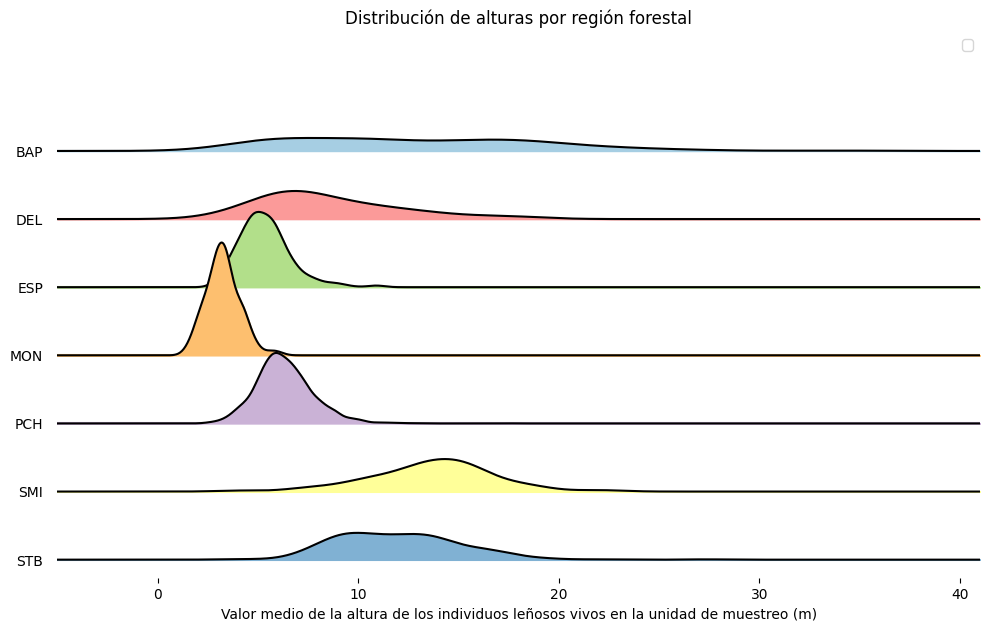

In [ ]:
from joypy import joyplot

colores = ['#a6cee3', '#fb9a99', '#b2df8a', '#fdbf6f', '#cab2d6', '#ffff99','#80b1d3']

plt.figure(figsize=(10, 6))
joyplot(
    data=df_general,
    by='REGION_OFC',
    column='MEDIA_ALTURA_UM_EST',
    figsize=(10, 6),
    kind='kde',         # usa densidad, no histograma
    overlap=1,          # superposición entre curvas (ajustable)
    color=colores
)
plt.title("Distribución de alturas por región forestal")
plt.xlabel("Valor medio de la altura de los individuos leñosos vivos en la unidad de muestreo (m)")
plt.ylabel("Región forestal")
#plt.legend()
#plt.tight_layout()
plt.show()


In [64]:
df_general.SUBREG.unique()

array(['Monte', 'Distrito del Caldén', 'Chaco Serrano', 'Chaco Árido',
       'Bosque montano', 'Selva montana', nan, 'Distrito del Algarrobo',
       'Chaco Semiárido', 'Distrito del Ñandubay', 'Chaco Húmedo',
       'Selva Paranaense', 'Bosque Andino Patagónico',
       'Islas del Río Paraná', 'Delta del Río Paraná',
       'Selva de transicion', 'Chaco de Transición'], dtype=object)

<Figure size 2000x2000 with 0 Axes>

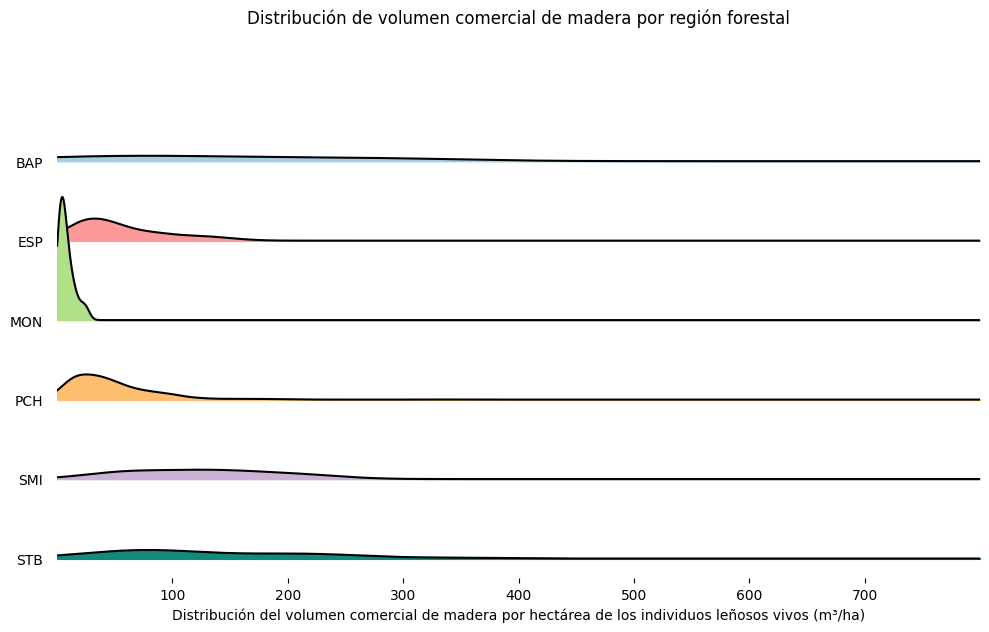

In [ ]:
from joypy import joyplot
import matplotlib.pyplot as plt

colores = ['#a6cee3', '#fb9a99', '#b2df8a', '#fdbf6f', '#cab2d6', "#128b7d","#99fff8"]

plt.figure(figsize=(20, 20))
joyplot(
    data=df_general_filtrado,
    by='REGION_OFC',
    column='VOL_M3_HA',
    figsize=(10, 6),
    kind='kde',         # usa densidad, no histograma
    overlap=1,          # superposición entre curvas (ajustable)
    color=colores,
    x_range=(0,800)
)
plt.title("Distribución de volumen comercial de madera por región forestal")
plt.xlabel("Distribución del volumen comercial de madera por hectárea de los individuos leñosos vivos (m³/ha)")
plt.ylabel("Región forestal")
#plt.legend()
#plt.tight_layout()
plt.show()

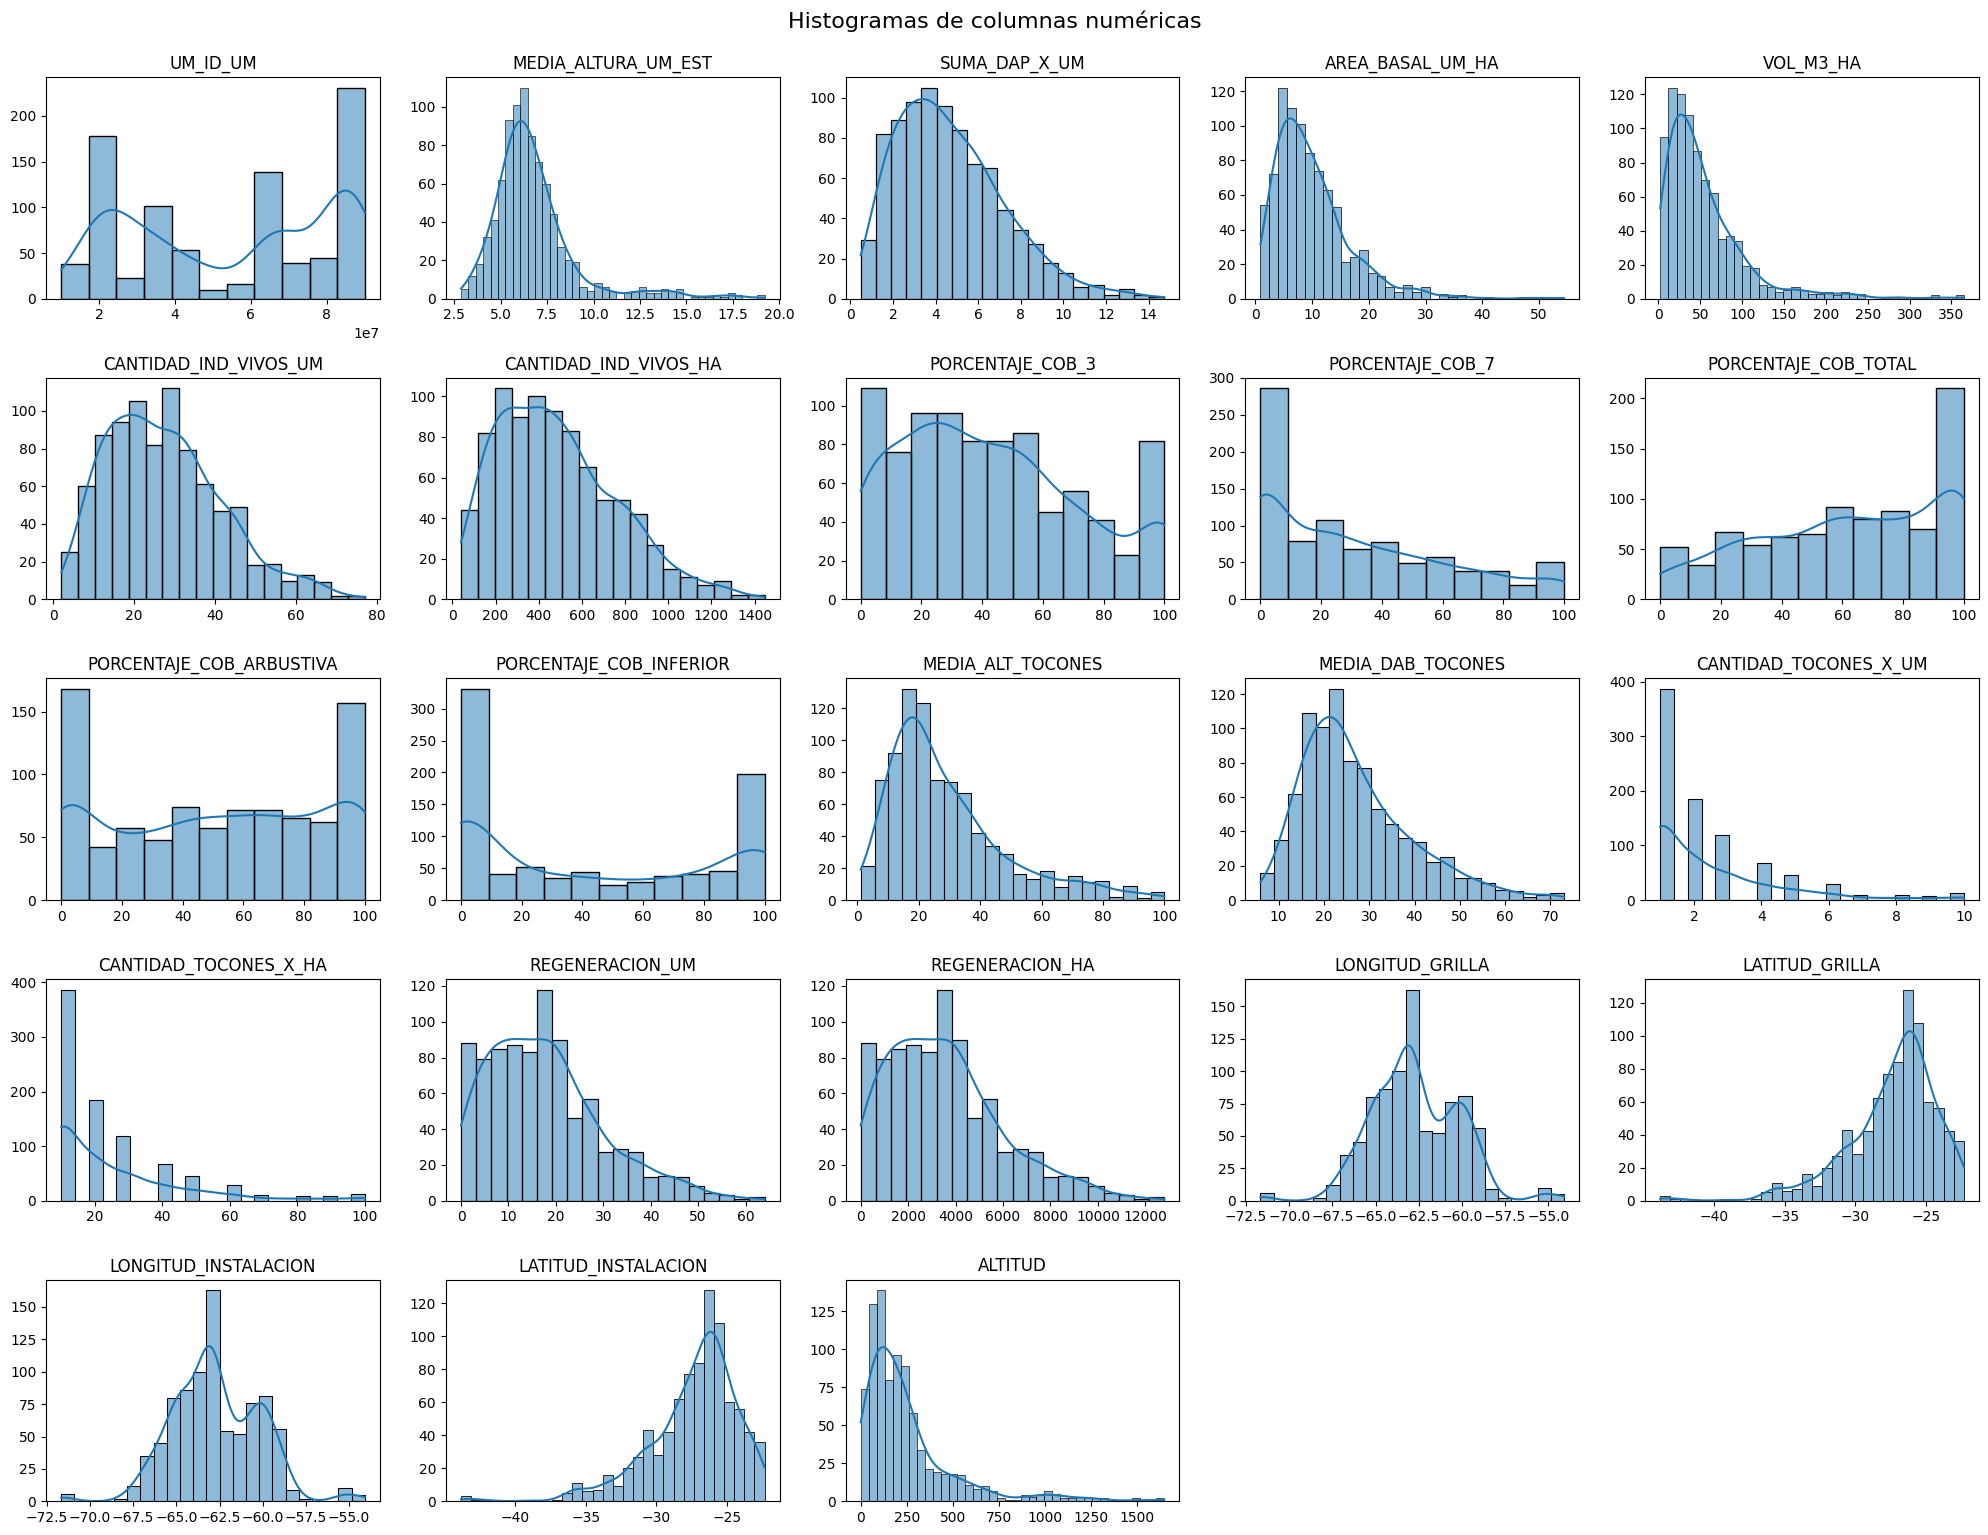

In [11]:
# Número de columnas a graficar
n = len(columnas_num)

# Determinar cantidad de filas y columnas
n_cols = 5
n_rows = math.ceil(n / n_cols)

# Crear figura y ejes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*4, n_rows*3))
axes = axes.flatten()  # Para iterar fácilmente

# Graficar cada histograma
for i, col in enumerate(columnas_num):
    sns.histplot(df_general_filtrado[col], kde=True, ax=axes[i])
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Borrar subplots vacíos si hay
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Histogramas de columnas numéricas", fontsize=16, y=1.02)
plt.show()

##### Matriz de correlación para vizualizar la interacción de diferentes variables numérricas:

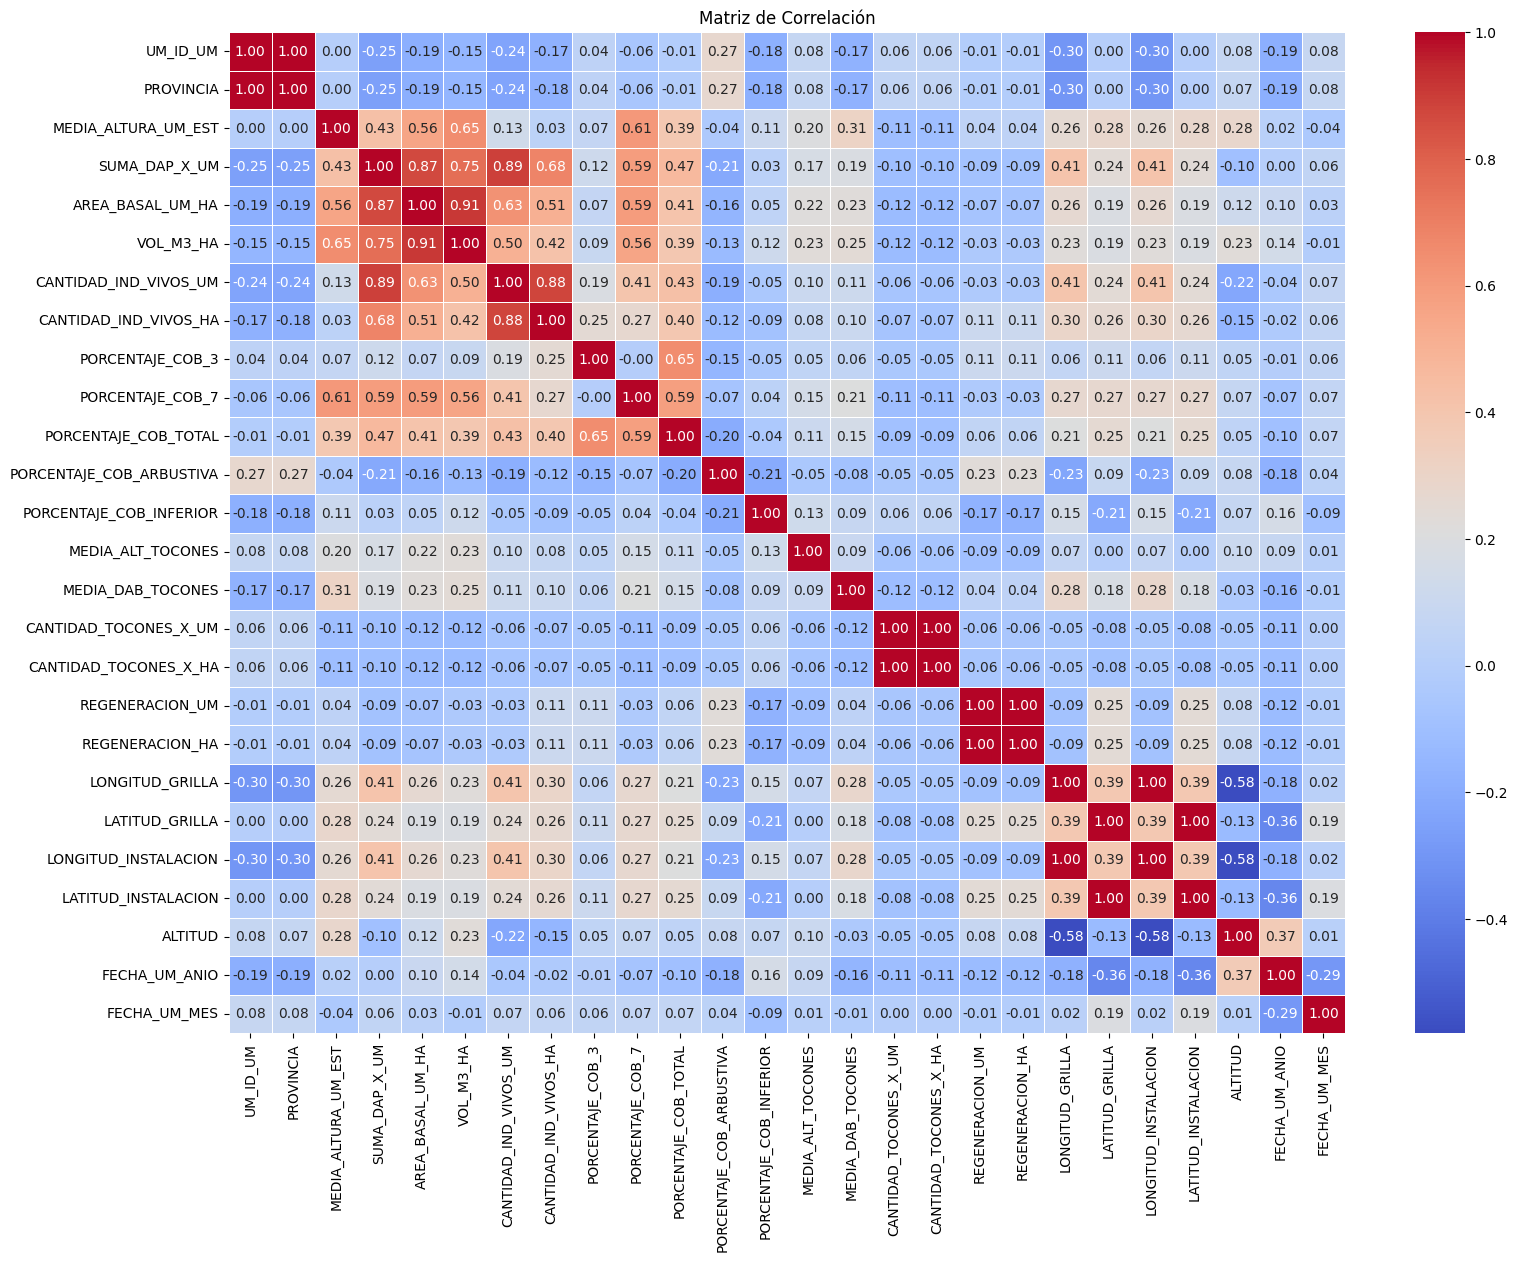

In [12]:
# creamos una matriz de correlación:
corr_matrix = df_general_filtrado.corr(method='pearson', numeric_only=True)

# lo visualizamos con un heatmap de seaborn:
plt.figure(figsize=(18, 13))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()

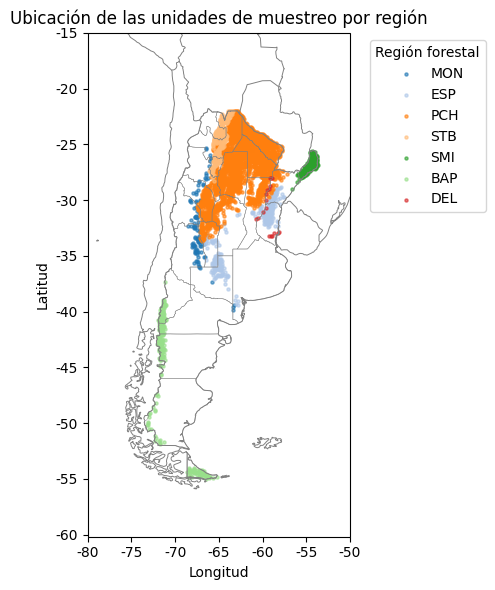

In [ ]:
# Paleta de colores para las regiones (modificá según cantidad de regiones)
import matplotlib.colors as mcolors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geopandas as gpd

provincias = gpd.read_file('https://geodata.ucdavis.edu/gadm/gadm4.1/json/gadm41_ARG_1.json') # para agregar departamentos:gadm41_ARG_2
# Por un problema de incompatibilidad de Github y los archivos de formato ".shp" se puede optar por 
# obtener la version .json directamente del sitio "https://geodata.ucdavis.edu/gadm/gadm4.1/json/":
# 'https://geodata.ucdavis.edu/gadm/gadm4.1/json/gadm41_ARG_0.json' >> Límites nacionales
# 'https://geodata.ucdavis.edu/gadm/gadm4.1/json/gadm41_ARG_1.json' >> Límites provinciales
# 'https://geodata.ucdavis.edu/gadm/gadm4.1/json/gadm41_ARG_2.json' >> Límites departamentales


# Obtener regiones únicas y asignar colores
regiones = df_general['REGION_OFC'].dropna().unique()
nombres_regiones = ['Monte','Espinal','Parque chaqueño','Yungas','Selva paranaense','Bosque andino patagónico','Delta e islas del Río Paraná']

colores = plt.cm.tab20.colors  # Paleta con hasta 20 colores

# Crear diccionario región -> color
color_map = {region: colores[i % len(colores)] for i, region in enumerate(regiones)}

fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Limites provinciales argentinos
provincias.boundary.plot(ax=ax, edgecolor='grey', linewidth=0.3)

# Límites internacionales y costeros
ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='grey', linewidth=0.7)
ax.add_feature(cfeature.COASTLINE, edgecolor='grey', linewidth=0.7)

# Graficar puntos coloreados según REGION_OFC
for region in regiones:
    df_region = df_general[df_general['REGION_OFC'] == region]
    ax.scatter(
        df_region['LONGITUD_INSTALACION'],
        df_region['LATITUD_INSTALACION'],
        color=color_map[region],
        s=5,
        alpha=0.6,
        label=region
    )

ax.set_extent([-75, -50, -60, -20])
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Ejes con ticks personalizados
xticks = np.arange(-80, -49, 5)
ax.set_xticks(xticks, crs=ccrs.PlateCarree())
ax.set_xticklabels([str(x) for x in xticks])

yticks = np.arange(-60, -14, 5)
ax.set_yticks(yticks, crs=ccrs.PlateCarree())
ax.set_yticklabels([str(y) for y in yticks])

ax.set_title('Ubicación de las unidades de muestreo por región')
ax.legend(title='Región forestal', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Los gráficos en el informe ejemplo son:

- Cantidad de especies en cada UM coordenadas geográficas
- Joyplots: Altura promedio por region forestal y distribucion del volumen de madera

CONSIGNA: Comparar la estructura de los bosques nativos de algunas de las regiones forestales del país. Boxplots, histogramas, gráficos de densidad, gráficos de dispersión, etc.